In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
df=pd.read_csv("df_clean2.csv")
df.head()

,DRNumber,DateOccurred,TimeOccurred,AreaID,AreaName,CrimeCode,CrimeCodeDescription,VictimAge,VictimSex,VictimDescent,Location,NewCrimeCategory,Violent_NonViolent
0,1208575,03/11/2013,1800,12,77th Street,626,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"(33.9829, -118.3338)",ASSAULT AND BATTERY,VIOLENT
1,121801608,01/01/2013,500,18,Southeast,626,INTIMATE PARTNER - SIMPLE ASSAULT,19.0,F,H,"(33.9456, -118.2652)",ASSAULT AND BATTERY,VIOLENT
2,130100508,01/02/2013,1430,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,39.0,F,H,"(34.0503, -118.2504)",ASSAULT AND BATTERY,VIOLENT
3,130100518,01/05/2013,100,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,34.0,F,H,"(34.045, -118.264)",ASSAULT AND BATTERY,VIOLENT
4,130100521,01/05/2013,1600,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,50.0,F,B,"(34.0423, -118.2452)",ASSAULT AND BATTERY,VIOLENT


## Converting the type of Time Occurred to Date time

In [3]:
df["DateOccurred"]=pd.to_datetime(df["DateOccurred"])
type(df["DateOccurred"][0])

pandas._libs.tslibs.timestamps.Timestamp

## ploting some line graphes showing crime rate vs year

Text(0.5,1,'crime rate vs year of individual areas')

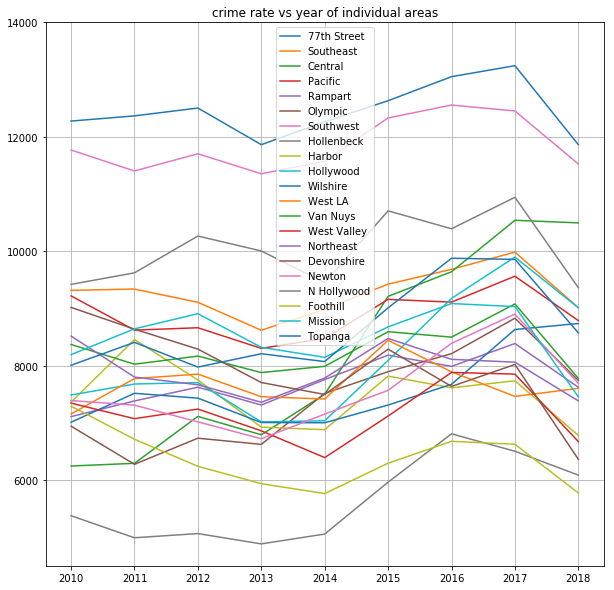

In [4]:
#import seaborn as sns

plt.figure(figsize=(10,10))
AreaName=df["AreaName"].unique().tolist()
df["YearOccurred"]=df["DateOccurred"].dt.year
for Area in AreaName:
    a=df.loc[df["AreaName"] == Area]
    #print(a.columns)
    
    df_year=a.groupby("YearOccurred")["DRNumber"].count()#.sort_values(ascending=True).reset_index()
    #print(a_year.index.values, a_year['DRNumber'])
    plt.plot(df_year.index.values, df_year.values, linestyle='-',label=Area)
    plt.legend()
plt.grid()
plt.ylim(4500,14000)
plt.title("crime rate vs year of individual areas")

Text(0.5,1,'crime rate vs year for 3 top safest and 3 least safe areas ')

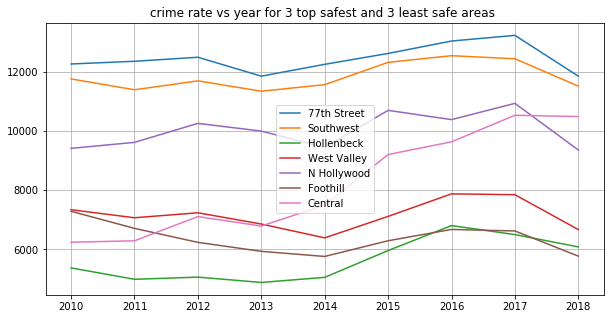

In [5]:
#import seaborn as sns

plt.figure(figsize=(10,5))
#AreaName=df["AreaName"].unique().tolist()
AreaName=['77th Street',  
        'Southwest', 'Hollenbeck',
         'West Valley',
       'N Hollywood', 'Foothill',"Central"
       ]
df["YearOccurred"]=df["DateOccurred"].dt.year
for Area in AreaName:
    a=df.loc[df["AreaName"] == Area]
    #print(a.columns)
    
    df_year=a.groupby("YearOccurred")["DRNumber"].count()#.sort_values(ascending=True).reset_index()
    #print(a_year.index.values, a_year['DRNumber'])
    plt.plot(df_year.index.values, df_year.values, linestyle='-',label=Area)
    plt.legend()
plt.grid()
plt.title("crime rate vs year for 3 top safest and 3 least safe areas ")

In [6]:
df.columns

Index(['DRNumber', 'DateOccurred', 'TimeOccurred', 'AreaID', 'AreaName',
       'CrimeCode', 'CrimeCodeDescription', 'VictimAge', 'VictimSex',
       'VictimDescent', 'Location', 'NewCrimeCategory', 'Violent_NonViolent',
       'YearOccurred'],
      dtype='object')

## Bar charts : comparing the crime rate of LA areas. Safest and most dangerous neighborhood in LA?

(0, 115000)

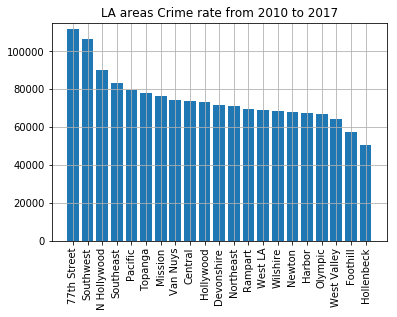

In [7]:
barchart=df.groupby("AreaName").count()
barchart=barchart.sort_values(by="NewCrimeCategory",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate from 2010 to 2017")
plt.ylim(0,115000)

## How much has crime rate of LA areas changed over the past 8 years?

(0, 13500)

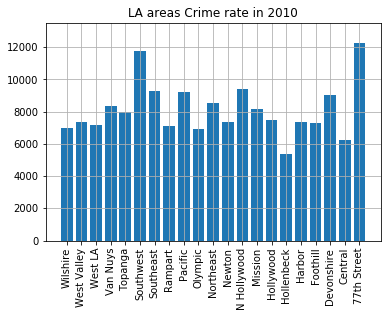

In [8]:
barchart=df.loc[df["YearOccurred"]==2010,["AreaName",'NewCrimeCategory']].groupby("AreaName").count()
barchart=barchart.sort_values(by="AreaName",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate in 2010")
plt.ylim(0,13500)

(0, 13500)

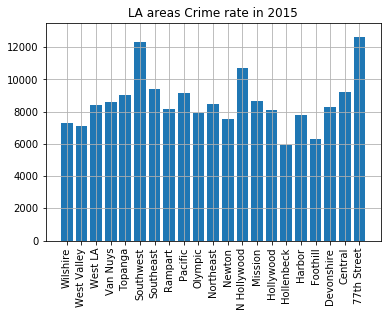

In [9]:
barchart=df.loc[df["YearOccurred"]==2015,["AreaName",'NewCrimeCategory']].groupby("AreaName").count()
barchart=barchart.sort_values(by="AreaName",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate in 2015")
plt.ylim(0,13500)

(0, 13500)

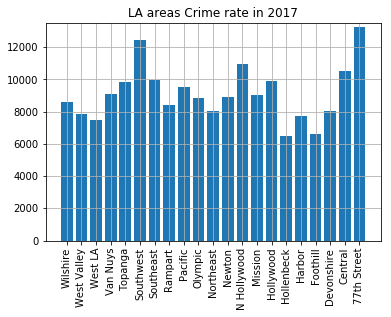

In [10]:
barchart=df.loc[df["YearOccurred"]==2017,["AreaName",'NewCrimeCategory']].groupby("AreaName").count()
barchart=barchart.sort_values(by="AreaName",ascending=False)
plt.bar(barchart.index,barchart.NewCrimeCategory)
plt.xticks(rotation ="vertical")
plt.grid()
plt.title("LA areas Crime rate in 2017")
plt.ylim(0,13500)

## Let's practice some BOXPLOT : crime rate variation of LA areas?

In [11]:
Boxplot=pd.DataFrame(df.groupby(["AreaName","YearOccurred"])["AreaID"].value_counts())

Boxplot=Boxplot.rename({"AreaID":"TotalCrime"},axis=1)
Boxplot.reset_index().head()

,AreaName,YearOccurred,AreaID,TotalCrime
0,77th Street,2010,12,12272
1,77th Street,2011,12,12363
2,77th Street,2012,12,12500
3,77th Street,2013,12,11860
4,77th Street,2014,12,12260


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21]), <a list of 21 Text xticklabel objects>)

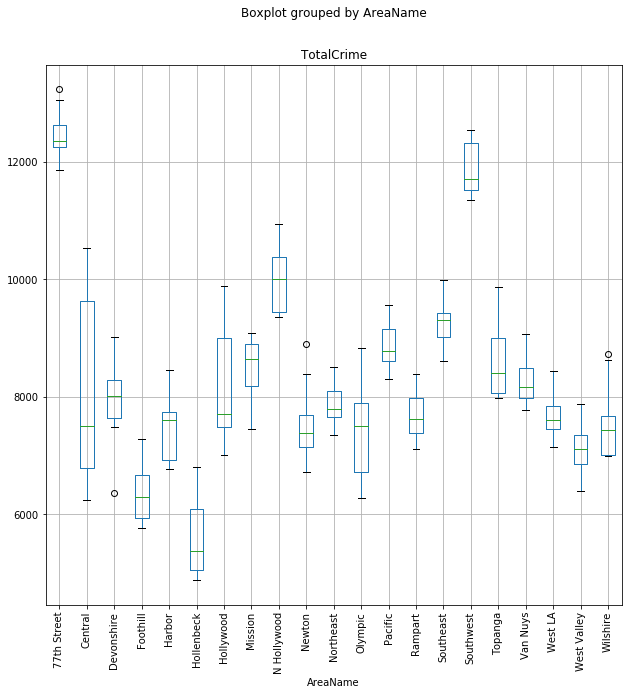

In [12]:
import scipy.stats as stats
Boxplot.boxplot("TotalCrime", by="AreaName", figsize=(10, 10))
plt.xticks(rotation="vertical")

## 3.	Which categories have the highest rates of crime? Does it change by neighborhood?

Text(0.5,1,'Hollnbeck')

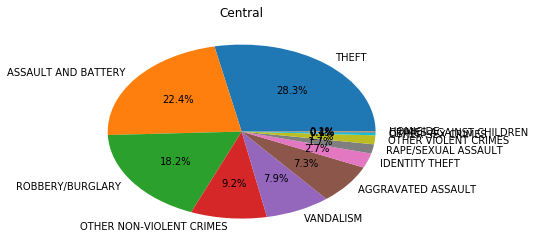

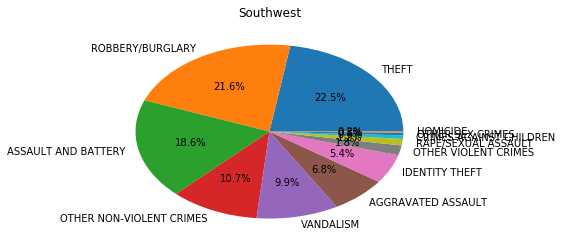

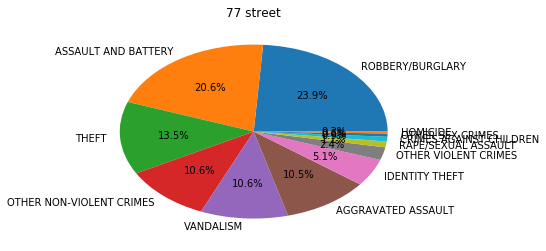

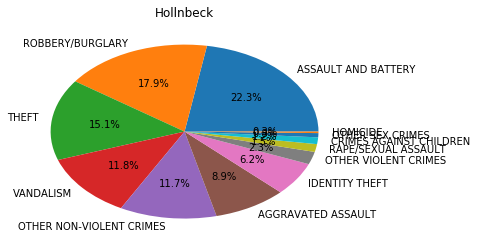

In [13]:
Central=pd.DataFrame(df.loc[df["AreaName"] == "Central","NewCrimeCategory"].value_counts()).reset_index()
plt.pie(Central["NewCrimeCategory"],labels=Central["index"],autopct='%1.1f%%')
plt.title("Central")
plt.figure()
Southwest=pd.DataFrame(df.loc[df["AreaName"] == "Southwest","NewCrimeCategory"].value_counts()).reset_index()
plt.pie(Southwest["NewCrimeCategory"],labels=Southwest["index"],autopct='%1.1f%%')
plt.title("Southwest")
plt.figure()
loc_77=pd.DataFrame(df.loc[df["AreaName"] == "77th Street","NewCrimeCategory"].value_counts()).reset_index()
type(loc_77)
plt.pie(loc_77["NewCrimeCategory"],labels=loc_77["index"],autopct='%1.1f%%')
plt.title("77 street")
plt.figure()
Hollenbeck=pd.DataFrame(df.loc[df["AreaName"] == "Hollenbeck","NewCrimeCategory"].value_counts()).reset_index()

plt.pie(Hollenbeck["NewCrimeCategory"],labels=Hollenbeck["index"],autopct='%1.1f%%')
plt.title("Hollnbeck")

## 5.	Are there different trends between violent and non-violent crimes?

Text(0.5,1,'Hollenbeck')

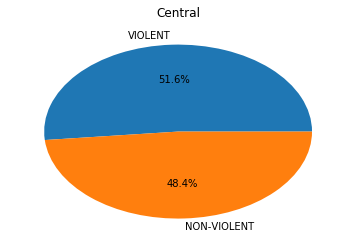

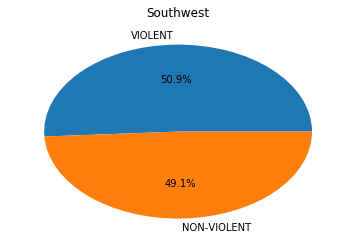

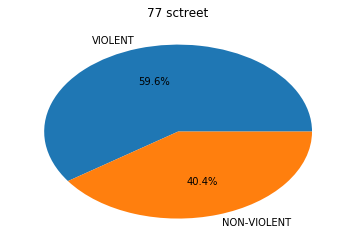

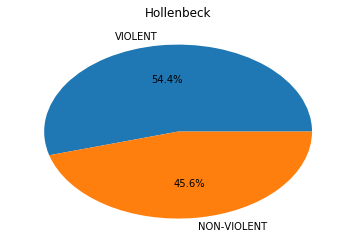

In [14]:
Central=pd.DataFrame(df.loc[df["AreaName"] == "Central","Violent_NonViolent"].value_counts()).reset_index()
plt.pie(Central["Violent_NonViolent"],labels=Central["index"],autopct='%1.1f%%')
plt.title("Central")
plt.figure()
Southwest=pd.DataFrame(df.loc[df["AreaName"] == "Southwest","Violent_NonViolent"].value_counts()).reset_index()
plt.pie(Southwest["Violent_NonViolent"],labels=Southwest["index"],autopct='%1.1f%%')
plt.title("Southwest")
plt.figure()
loc_77=pd.DataFrame(df.loc[df["AreaName"] == "77th Street","Violent_NonViolent"].value_counts()).reset_index()
type(loc_77)
plt.pie(loc_77["Violent_NonViolent"],labels=loc_77["index"],autopct='%1.1f%%')
plt.title("77 sctreet")
plt.figure()
Hollenbeck=pd.DataFrame(df.loc[df["AreaName"] == "Hollenbeck","Violent_NonViolent"].value_counts()).reset_index()

plt.pie(Hollenbeck["Violent_NonViolent"],labels=Hollenbeck["index"],autopct='%1.1f%%')
plt.title("Hollenbeck")

In [15]:
df.head()


,DRNumber,DateOccurred,TimeOccurred,AreaID,AreaName,CrimeCode,CrimeCodeDescription,VictimAge,VictimSex,VictimDescent,Location,NewCrimeCategory,Violent_NonViolent,YearOccurred
0,1208575,2013-03-11,1800,12,77th Street,626,INTIMATE PARTNER - SIMPLE ASSAULT,30.0,F,W,"(33.9829, -118.3338)",ASSAULT AND BATTERY,VIOLENT,2013
1,121801608,2013-01-01,500,18,Southeast,626,INTIMATE PARTNER - SIMPLE ASSAULT,19.0,F,H,"(33.9456, -118.2652)",ASSAULT AND BATTERY,VIOLENT,2013
2,130100508,2013-01-02,1430,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,39.0,F,H,"(34.0503, -118.2504)",ASSAULT AND BATTERY,VIOLENT,2013
3,130100518,2013-01-05,100,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,34.0,F,H,"(34.045, -118.264)",ASSAULT AND BATTERY,VIOLENT,2013
4,130100521,2013-01-05,1600,1,Central,626,INTIMATE PARTNER - SIMPLE ASSAULT,50.0,F,B,"(34.0423, -118.2452)",ASSAULT AND BATTERY,VIOLENT,2013


In [25]:
print(df["VictimDescent"].unique())
df.groupby("VictimDescent")["DRNumber"].count().sort_values(ascending=False)

['W' 'H' 'B' 'A' 'O' 'K' 'F' 'J' 'X' 'P' 'I' 'V' 'Z' 'S' 'D' 'G' 'C' 'L'
 'U' '-']


VictimDescent
H    619816
W    424172
B    291481
O    155683
A     43780
X     24353
K      7703
F      2138
I       782
C       731
P       304
J       283
U       136
V       114
Z        75
G        71
S        27
D        16
L        10
-         2
Name: DRNumber, dtype: int64

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

### Summary data on ethnicity and victimization : are all the ethnic groups equally likely victim?

In [35]:
df_Descent=pd.DataFrame(df.groupby("VictimDescent")["NewCrimeCategory"].value_counts())

df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()
print()
for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B") & (df_Descent['VictimDescent'][i] != "A" )  & (df_Descent['VictimDescent'][i] != "A" ) :
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
        
df_Descent.head(5)       

,VictimDescent,NewCrimeCategory,Counts
0,other,OTHER VIOLENT CRIMES,1
1,other,VANDALISM,1
2,A,ROBBERY/BURGLARY,13639
3,A,THEFT,12107
4,A,ASSAULT AND BATTERY,4914


               Counts
VictimDescent        
A               43780
B              291481
H              619816
W              424172
other          192428
Index(['A', 'B', 'H', 'W', 'other'], dtype='object', name='VictimDescent')


([<matplotlib.patches.Wedge at 0x116feb898>,
 [Text(-0.0961392,1.09579,'Asian'),
  Text(-0.755944,0.799093,'Black'),
  Text(-0.639824,-1.0152,'Hispanic/Latin/Mexican'),
  Text(1.09882,-0.05097,'White'),
  Text(0.412748,1.01963,'Other')],
 [Text(-0.0524396,0.597704,'2.8%'),
  Text(-0.412333,0.435869,'18.5%'),
  Text(-0.373231,-0.592198,'39.4%'),
  Text(0.599356,-0.0278018,'27.0%'),
  Text(0.225135,0.55616,'12.2%')])

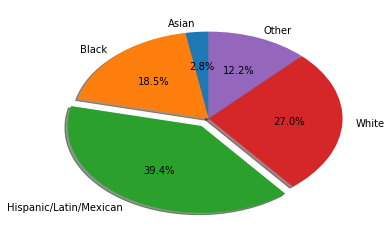

In [37]:
df_Descent_total=pd.DataFrame(df_Descent.groupby("VictimDescent")["Counts"].sum())
print(df_Descent_total)
print(df_Descent_total.index)
plt.pie(df_Descent_total["Counts"],labels=["Asian","Black","Hispanic/Latin/Mexican","White","Other"],autopct='%1.1f%%',
       startangle=90, explode=(0,0, 0.1, 0,0),shadow=True)


<Figure size 432x288 with 0 Axes>

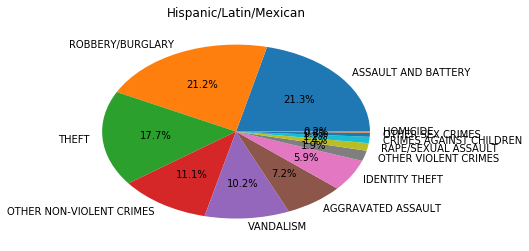

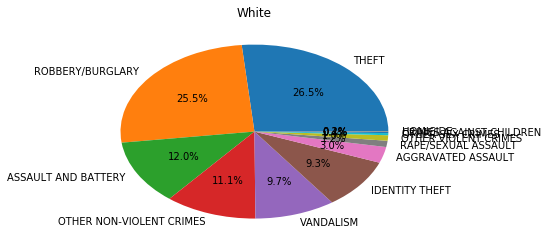

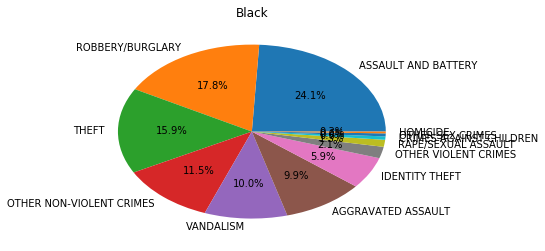

<Figure size 432x288 with 0 Axes>

In [38]:

#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

#df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
#plt.pie(df_Descent_other["Counts"],labels=(df_Descent_other["NewCrimeCategory"]),autopct='%1.1f%%')
#plt.title("other")

<Figure size 432x288 with 0 Axes>

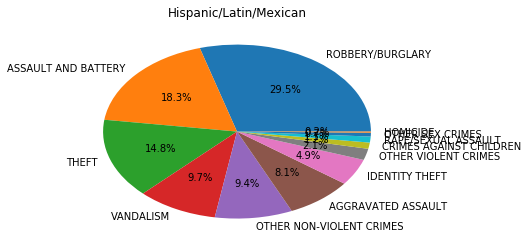

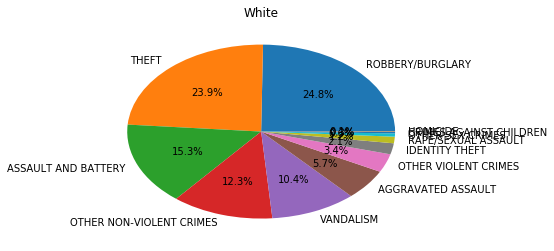

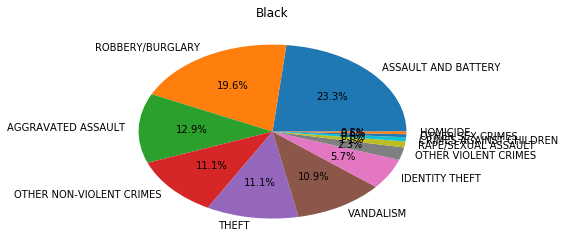

<Figure size 432x288 with 0 Axes>

In [39]:
loc_77=df.loc[df["AreaName"] == "77th Street"]
df_Descent=pd.DataFrame(loc_77.groupby("VictimDescent")["NewCrimeCategory"].value_counts())
df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

#df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
#plt.pie(df_Descent_other["Counts"],labels=(df_Descent_other["NewCrimeCategory"]),autopct='%1.1f%%')
#plt.title("other")

<Figure size 432x288 with 0 Axes>

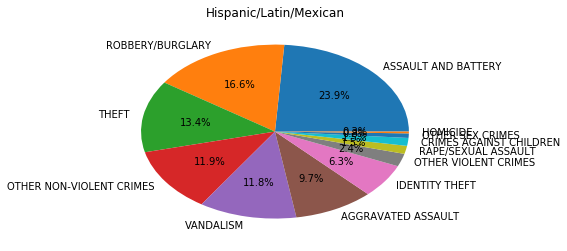

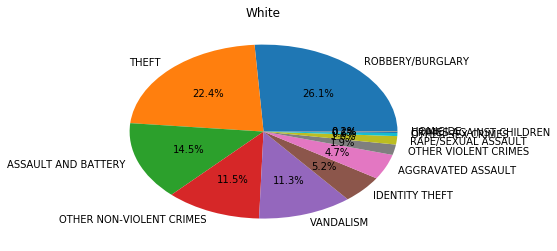

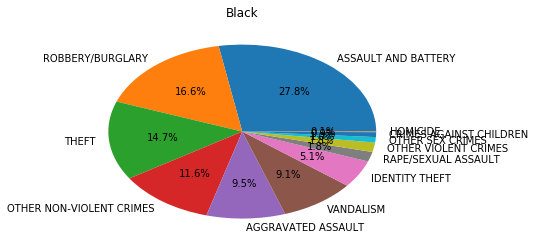

<Figure size 432x288 with 0 Axes>

In [20]:
Hollenbeck=df.loc[df["AreaName"] == "Hollenbeck"]
df_Descent=pd.DataFrame(Hollenbeck.groupby("VictimDescent")["NewCrimeCategory"].value_counts())
df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["NewCrimeCategory"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

#df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
#plt.pie(df_Descent_other["Counts"],labels=(df_Descent_other["NewCrimeCategory"]),autopct='%1.1f%%')
#plt.title("other")

<Figure size 432x288 with 0 Axes>

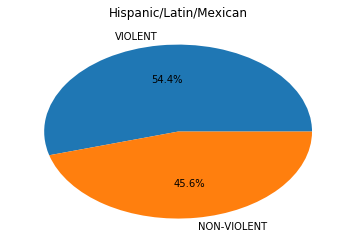

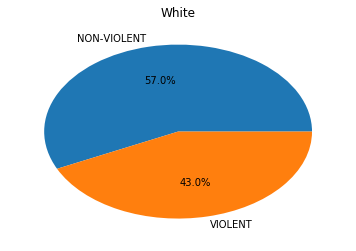

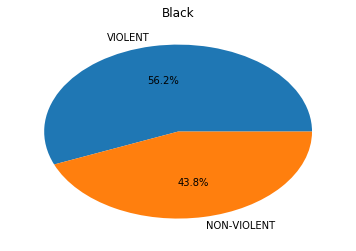

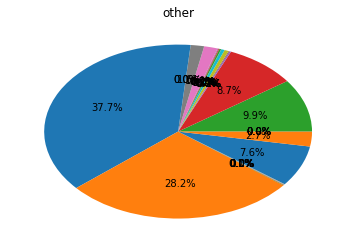

<Figure size 432x288 with 0 Axes>

In [21]:
df_Descent=pd.DataFrame(df.groupby("VictimDescent")["Violent_NonViolent"].value_counts())
df_Descent=df_Descent.rename({"Violent_NonViolent":"Counts"},axis=1).reset_index()

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()

df_Descent_H=df_Descent.loc[df_Descent["VictimDescent"] == "H"]
plt.pie(df_Descent_H["Counts"],labels=(df_Descent_H["Violent_NonViolent"]),autopct='%1.1f%%')
plt.title("Hispanic/Latin/Mexican")
plt.figure()

df_Descent_W=df_Descent.loc[df_Descent["VictimDescent"] == "W"]
plt.pie(df_Descent_W["Counts"],labels=(df_Descent_W["Violent_NonViolent"]),autopct='%1.1f%%')
plt.title("White")
plt.figure()

df_Descent_B=df_Descent.loc[df_Descent["VictimDescent"] == "B"]
plt.pie(df_Descent_B["Counts"],labels=(df_Descent_B["Violent_NonViolent"]),autopct='%1.1f%%')
plt.title("Black")
plt.figure()

df_Descent_other=df_Descent.loc[df_Descent["VictimDescent"] == "other"]
plt.pie(df_Descent_other["Counts"],autopct='%1.1f%%')
plt.title("other")
plt.figure()

In [22]:
df_Descent=pd.DataFrame(df.loc[df["AreaName"] == "77 Street"].groupby("VictimDescent")["NewCrimeCategory"].value_counts())
df_Descent=df_Descent.rename({"NewCrimeCategory":"Counts"},axis=1).reset_index()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 0 but corresponding boolean dimension is 1

In [ ]:
df_Descent=df

for i in range(0,len(df_Descent["VictimDescent"])):
    if (df_Descent['VictimDescent'][i] != "H" ) & (df_Descent['VictimDescent'][i] != "W" ) & (df_Descent['VictimDescent'][i] != "B" ):
        df_Descent.iloc[i, df_Descent.columns.get_loc('VictimDescent')] = "other"
#df_Descent=df.groupby("VictimDescent").count()
#df_Descent=df_Descent.sort_values(by="DRNumber", ascending=False).reset_index()
df_Descent.head(30)

In [ ]:
df_Descent['VictimDescent'][0]

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian 
              H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese 
              K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian 
              V - Vietnamese W - White X - Unknown Z - Asian Indian

In [ ]:
print(df_Descent.iloc[0:3,2].sum())
print(df_Descent.iloc[4:,2].sum())

In [ ]:
for i in range(0,19):
    if (trial["VictimDescent"][i] != "H") & (trial["VictimDescent"][i] != "W") & (trial["VictimDescent"][i] != "B") :
        trial.iloc[19, trial.columns.get_loc('VictimDescent')] = "other"

trial

In [ ]:
import seaborn as sns

#plt.figure()
AreaName=df_clean["AreaName"].unique().tolist()
df_clean["YearOccurred"]=df_clean["DateOccurred"].dt.year
for Area in AreaName:
    a=df_clean.loc[df_clean["AreaName"] == Area]
    #print(a.columns)
    
    a_year=a.groupby("YearOccurred")["DRNumber"].count()#.sort_values(ascending=True).reset_index()
    #print(a_year.index.values, a_year['DRNumber'])
    plt.plot(a_year.index.values, a_year.values, linestyle='-')

In [ ]:
df_clean["DateOccurred"].dt.year


In [ ]:
#df.groupby("NewCrimeCategory").count().sort_values(by="DRNumber",ascending=False).index
df["NewCrimeCategory"].unique()
df[df["NewCrimeCategory"]== "ROBBERY/BURGLARY"]["DRNumber"].count()

In [ ]:
df.columns